In [202]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn

# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor

# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [203]:
traffic_df = pd.read_csv('Traffic_Volume.csv')
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,10/2/12 9:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,10/2/12 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,10/2/12 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,10/2/12 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,10/2/12 13:00,4918
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,9/30/18 19:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,9/30/18 20:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,9/30/18 21:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,9/30/18 22:00,1450


In [204]:
traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'], format='%m/%d/%y %H:%M')

traffic_df['month'] = traffic_df['date_time'].dt.month_name()
traffic_df['weekday'] = traffic_df['date_time'].dt.day_name()
traffic_df['hour'] = traffic_df['date_time'].dt.hour

traffic_df.drop(columns=['date_time'], inplace=True)
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,month,weekday,hour
0,NaN,288.28,0.0,0.0,40,Clouds,5545,October,Tuesday,9
1,NaN,289.36,0.0,0.0,75,Clouds,4516,October,Tuesday,10
2,NaN,289.58,0.0,0.0,90,Clouds,4767,October,Tuesday,11
3,NaN,290.13,0.0,0.0,90,Clouds,5026,October,Tuesday,12
4,NaN,291.14,0.0,0.0,75,Clouds,4918,October,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,3543,September,Sunday,19
48200,NaN,282.76,0.0,0.0,90,Clouds,2781,September,Sunday,20
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,2159,September,Sunday,21
48202,NaN,282.09,0.0,0.0,90,Clouds,1450,September,Sunday,22


In [221]:
traffic_df.to_csv('train_df.csv', index=False)  # Avoid saving the index
train_df = pd.read_csv('train_df.csv')
train_df


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,month,weekday,hour
0,NaN,288.28,0.0,0.0,40,Clouds,5545,October,Tuesday,9
1,NaN,289.36,0.0,0.0,75,Clouds,4516,October,Tuesday,10
2,NaN,289.58,0.0,0.0,90,Clouds,4767,October,Tuesday,11
3,NaN,290.13,0.0,0.0,90,Clouds,5026,October,Tuesday,12
4,NaN,291.14,0.0,0.0,75,Clouds,4918,October,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,3543,September,Sunday,19
48200,NaN,282.76,0.0,0.0,90,Clouds,2781,September,Sunday,20
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,2159,September,Sunday,21
48202,NaN,282.09,0.0,0.0,90,Clouds,1450,September,Sunday,22


In [207]:
cat_var = ['holiday', 'weather_main', 'month', 'weekday', 'hour']
# Select input and output features
X = traffic_df.drop(columns = ['traffic_volume'])
y = traffic_df['traffic_volume']

In [208]:
# One-hot encode only the specified categorical columns
X_encoded = pd.get_dummies(X, columns=cat_var, drop_first=True)
X_encoded


,temp,rain_1h,snow_1h,clouds_all,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,288.28,0.0,0.0,40,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,289.36,0.0,0.0,75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,289.58,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,290.13,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,291.14,0.0,0.0,75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48200,282.76,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48201,282.73,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48202,282.09,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [209]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [210]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [211]:
# chat helped me brainstorm to use regressor and workout the code

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'max_depth': 19,
    'learning_rate': 0.23,
}

# Create an XGBRegressor instance to use with MAPIE
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', 
                                 max_depth=19, 
                                 learning_rate=0.23, 
                                 n_estimators=100)

# Fit the XGBRegressor using training data
xgb_regressor.fit(train_X, train_y)

# Make predictions
y_pred = xgb_regressor.predict(test_X)

In [212]:
from sklearn.metrics import r2_score

# Evaluate the model
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R^2 score
r2 = r2_score(test_y, y_pred)
print(f"R^2 Score with XGBoost: {r2:.3f}")

Mean Squared Error: 237716.4565
R^2 Score with XGBoost: 0.940


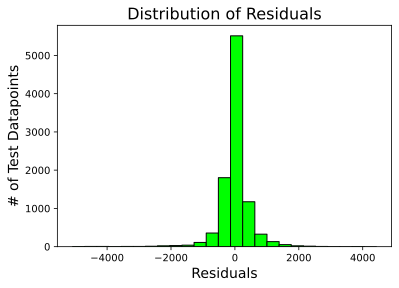

In [213]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("traffic_dist.svg");

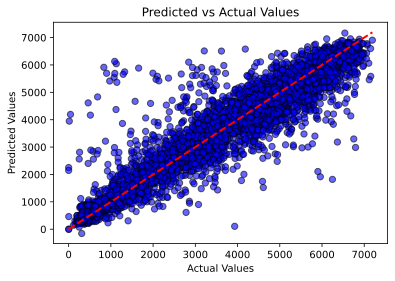

In [214]:
# Setting the figure size and resolution
plt.figure(figsize = (6, 4), dpi = 150)

# Scatter plot of actual vs predicted values
plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# 45-degree reference line (perfect predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# Axis labels and title
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10)
plt.title('Predicted vs Actual Values', fontsize = 12)

# Adjust ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("traffic_predvsactual.svg");

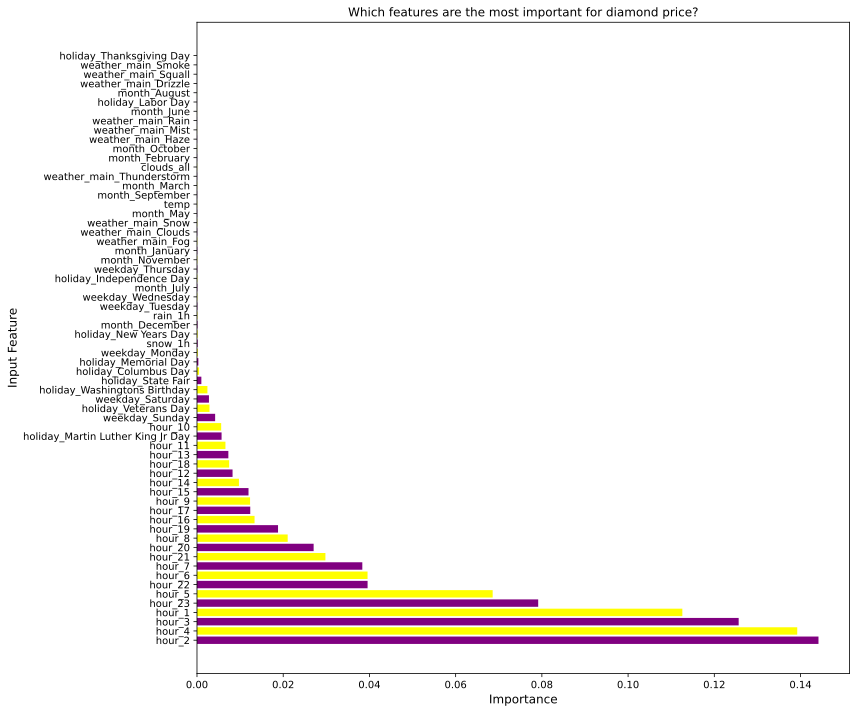

In [215]:
# Storing importance values from the trained model
importance = xgb_regressor.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(12, 10))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'yellow'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for diamond price?', fontsize = 12) 
plt.yticks(fontsize = 10) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();
plt.savefig("traffic_feature_imp.svg");

***** MAPIE *****

In [216]:
# Define MAPIE regressor
mapie = MapieRegressor(estimator = xgb_regressor, # Prediction model to use
                       n_jobs = -1,
                       random_state = 42)

# Fit mapie regressor on training data
start = time.time()  
mapie.fit(train_X, train_y)
stop = time.time()             
print(f"Training time: {stop - start}s")

alpha = 0.1 # For 90% confidence level

# Use mapie.predict() to get predicted values and intervals
y_test_pred, y_test_pis = mapie.predict(test_X, alpha = alpha)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:58:40] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:58:40] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it ba

Training time: 30.1408588886261s


In [217]:
# Storing results in a dataframe
predictions = test_y.to_frame()
predictions.columns = ['Actual Value']
predictions["Predicted Value"] = y_test_pred.round(2)
predictions["Lower Value"] = y_test_pis[:, 0].round(2)
predictions["Upper Value"] = y_test_pis[:, 1].round(2)

# Take a quick look
predictions.tail(5)

,Actual Value,Predicted Value,Lower Value,Upper Value
6401,2491,2631.520020,1883.25,3344.50
34004,5251,5429.299805,4753.56,6133.92
46086,2224,2337.949951,1569.78,2954.64
42579,2928,2585.639893,1935.80,3340.14
23709,910,817.840027,118.40,1490.74


In [218]:
coverage = regression_coverage_score(test_y,           # Actual values
                                     y_test_pis[:, 0], # Lower bound of prediction intervals
                                     y_test_pis[:, 1]) # Upper bound of prediction intervals

coverage_percentage = coverage * 100
print(f"Coverage: {coverage_percentage:.2f}%")

Coverage: 93.76%


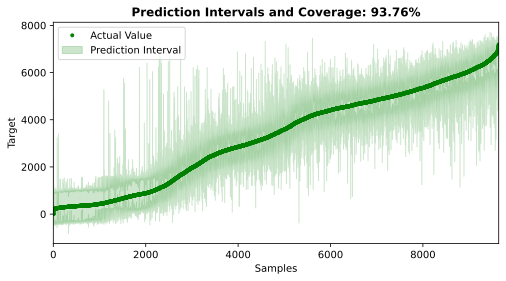

In [219]:
# Sort the predictions by 'Actual Value' for better visualization and reset the index
sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

# Create a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual values with green dots
plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

# Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["Lower Value"],
                 sorted_predictions["Upper Value"],
                 alpha=0.2, color="green", label="Prediction Interval")

# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the limit for the x-axis to cover the range of samples
plt.xlim([0, len(sorted_predictions)])

# Label the x-axis and y-axis with appropriate font size
plt.xlabel("Samples", fontsize=10)
plt.ylabel("Target", fontsize=10)

# Add a title to the plot, including the coverage percentage, with bold formatting
plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# Add a legend to the plot, placed in the upper left, with specified font size
plt.legend(loc="upper left", fontsize=10);
plt.savefig("traffic_coverage.svg");

In [220]:
# Creating the file where we want to write the model
reg_pickle = open('traffic_mapie.pickle', 'wb') 

# Write RF model to the file
pickle.dump(mapie, reg_pickle) 

# Close the file
reg_pickle.close()